A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset. (The dataset is in a separate file: ingredient.csv) 
 
 Please assist the consultant in the area of statistical analysis by doing this;  
 
 a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must. 

In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ingredient.csv', sep=',', low_memory=False)

In [3]:
df.head

<bound method NDFrame.head of            a      b     c     d      e     f      g     h     i
0    1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.00  0.07
1    1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
2    1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.00  0.03
3    1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.00  0.00
4    1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.00  0.00
5    1.51721  12.87  3.48  1.33  73.04  0.56   8.43  0.00  0.00
6    1.51596  12.79  3.61  1.62  72.97  0.64   8.07  0.00  0.26
7    1.51316  13.02  0.00  3.04  70.48  6.21   6.96  0.00  0.00
8    1.51747  12.84  3.50  1.14  73.27  0.56   8.55  0.00  0.00
9    1.52121  14.03  3.76  0.58  71.79  0.11   9.65  0.00  0.00
10   1.51736  12.78  3.62  1.29  72.79  0.59   8.70  0.00  0.00
11   1.51640  12.55  3.48  1.87  73.23  0.63   8.08  0.00  0.09
12   1.51977  13.81  3.58  1.32  71.72  0.12   8.67  0.69  0.00
13   1.51806  13.00  3.80  1.08  73.07  0.56   8.38  0.00  0.12
14   1.517

In [4]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [5]:
df.sample(10)

,a,b,c,d,e,f,g,h,i
213,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.0,0.00
93,1.51665,13.14,3.45,1.76,72.48,0.60,8.38,0.0,0.17
45,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.0,0.00
110,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.0,0.00
168,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
125,1.51605,12.90,3.44,1.45,73.06,0.44,8.27,0.0,0.00
74,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.0,0.28
138,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00
66,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.0,0.00


In [22]:
df.isnull()

,a,b,c,d,e,f,g,h,i
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


C:\Users\yassifn\Anaconda3\envs\Python3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


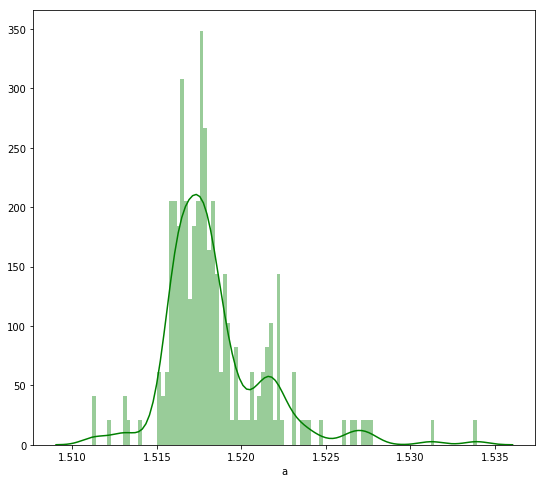

In [7]:
plt.figure(figsize=(9, 8))
sns.distplot(df['a'], color='g', bins=100, hist_kws={'alpha': 0.4});

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254DF348198>,
      dtype=object)

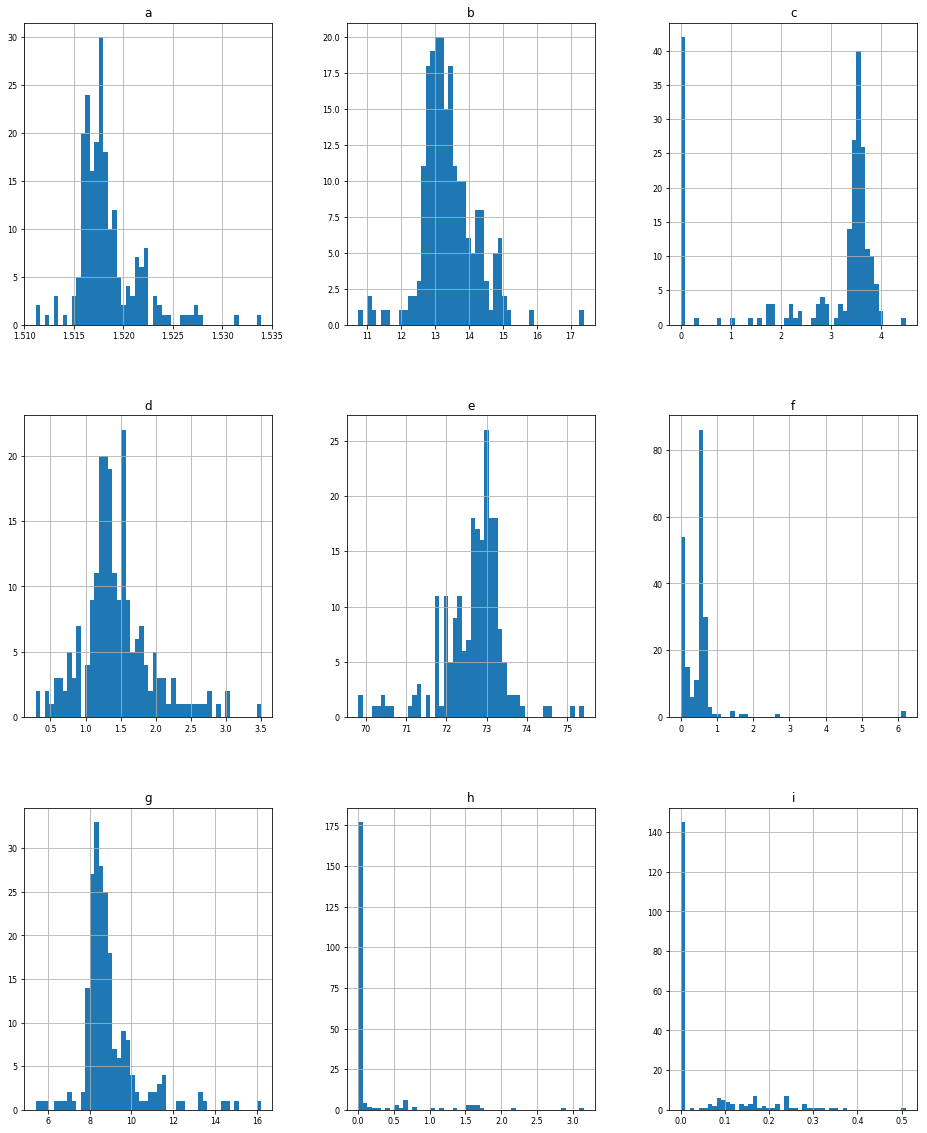

In [8]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [16]:
df_corr = df.corr()['a'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with a:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with a:
a    1.000000
g    0.810403
e   -0.542052
Name: a, dtype: float64


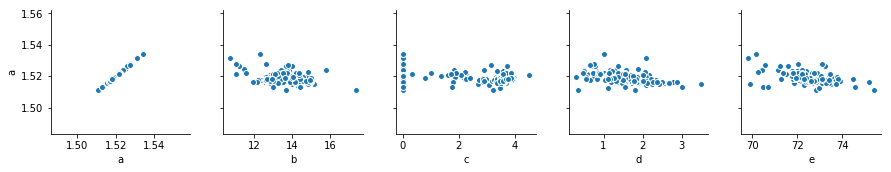

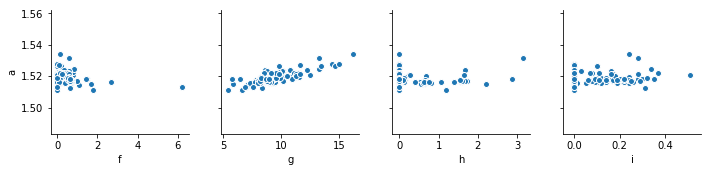

In [17]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['a'])